In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('./csv_files/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

In [20]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [21]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs = inputs.drop('Sex', axis='columns')

In [23]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [28]:
mean_age = inputs.Age.mean()
inputs.Age = inputs.Age.fillna(mean_age)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_test, y_test)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [36]:
model.score(X_test, y_test)

0.8268156424581006

In [38]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0])

In [40]:
y_test

820    1
233    1
1      1
525    0
393    1
      ..
822    0
98     1
674    0
641    1
355    0
Name: Survived, Length: 179, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

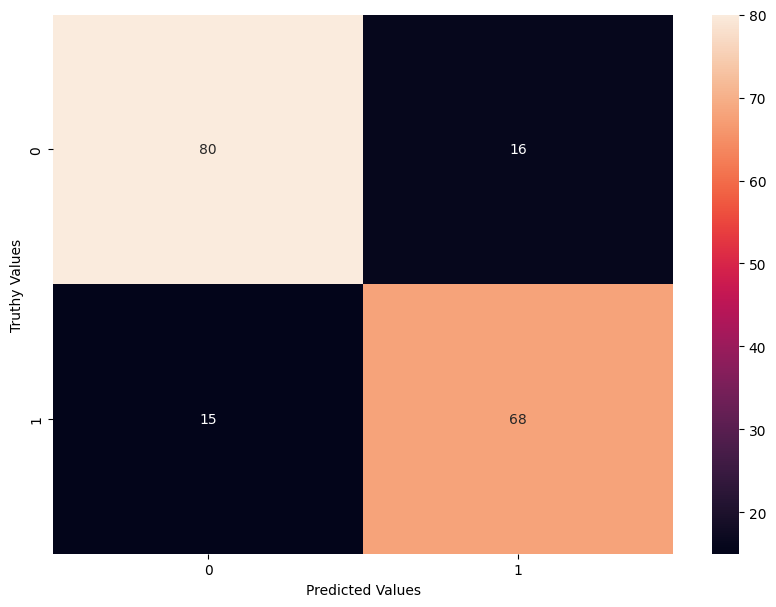

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truthy Values')
plt.show()